## Введение

Matplotlib - это "дедушка"  всех библиотек для визуализации на Python. Он был создан Джоном Гюнтером. Его целью было скопировать визуализационные возможности MatLab для работы с Python. Так что, если вы знакомы с matlab, взаимодействие сmatplotlib будет для вас естественным.

Несколько главных плюсов Matplotlib :

* Легко начать работу с простыми графиками
* Большой контроль над каждым элементом фигуры
* Высококачественный выходной файл во многих форматах
* Возможна очень широкая кастомизация в целом

Matplotlib позволяет создавать воспроизводимые графики программно. Давайте научимся использовать его! 
Изучить официальную документацию можно тут: http://matplotlib.org/

## Установка 

Чтобы поставить matplotlib через conda:
```
    conda install matplotlib
```
или pip
```
    pip install matplotlib
```
    
## Использование

Импортируйте модуль `matplotlib.pyplot` под именем` plt` (аккуратным способом):

In [1]:
import matplotlib.pyplot as plt

Вам также нужно использовать такую строку (это [ipython magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html)) для того, чтобы смотреть на графики из ноутбука.

In [2]:
%matplotlib inline

Эта строка нужна только для jupyter notebooks, если у вас другой редактор, просто используйте `plt.show()` после всех команд для построения, и вы увидите график в новом окне.

# Простой пример

Давайте разберем очень простой пример, используя 2 numpy-массива. Можно использовать списки, но лучше использовать numpy-arrays или pandas-columns (которые тоже ведут себя как массивы):

Данные, которые мы хотим построить:

In [3]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

In [4]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [5]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

## Простые команды matplotlib

Мы можем создать очень простой line-plot, используя следующее (Почитать docstring для библиотечных функций всегда можно зажимая `Shift+Tab` после ее имени)

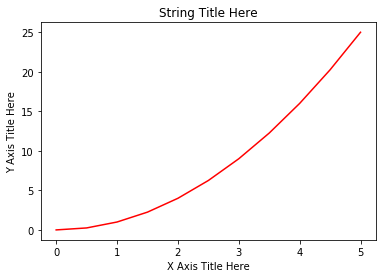

In [6]:
plt.plot(x, y, 'r') # 'r' is the color red
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
plt.show()

## Несколько графиков на одном полотне

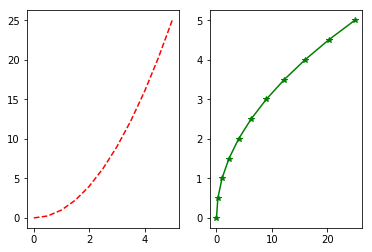

In [7]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # More on color options later
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

___
# Объектно-ориентированный Matplotlib 
Сейчас мы сделали базовые вещи, давайте перейдем к более формальному введению в Matplotlib's Object Oriented API. Это означает, что мы будем создавать объекты фигур, а затем вызывать методы или атрибуты из этого объекта.

## Введение в объектно-ориентированный метод

Основная идея использования более формального объектно-ориентированного метода заключается в создании фигурных объектов, а затем вызова методов или атрибутов этого объекта. Этот подход более приятен при работе с холстом с несколькими графиками на нем.

Text(0.5,1,'Set Title')

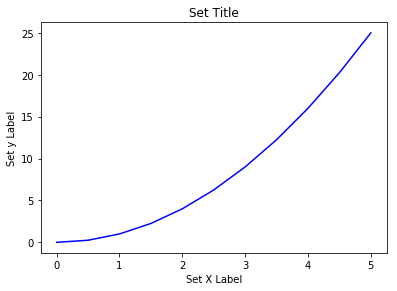

In [8]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label') # Notice the use of set_ to begin methods
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

Код немного сложнее, но преимущество в том, что теперь мы полностью контролируем, где располагаются оси графика, и мы можем легко добавить к фигуре больше одной оси:

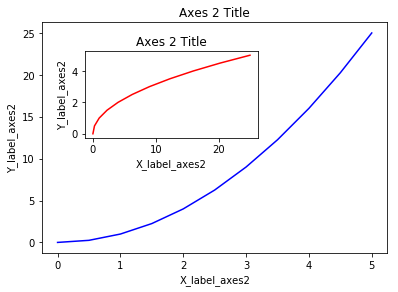

In [9]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

## subplots()

Объекты plt.subplots() будут действовать более автоматически.

Основные варианты использования:

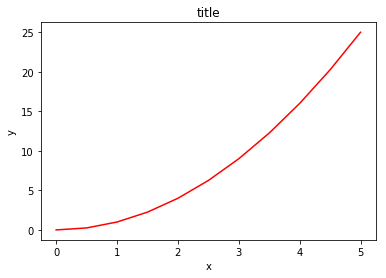

In [10]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots()

# Now use the axes object to add stuff to plot
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Затем вы можете указать количество строк и столбцов при создании объекта subplots ():

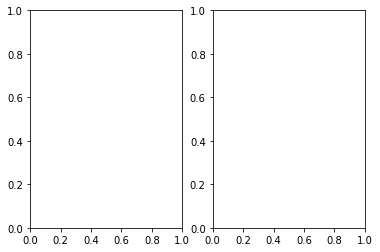

In [11]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

In [12]:
# Axes is an array of axes to plot on
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x108b6b780>,
      dtype=object)

Мы можем выполнить итерацию по этому массиву:

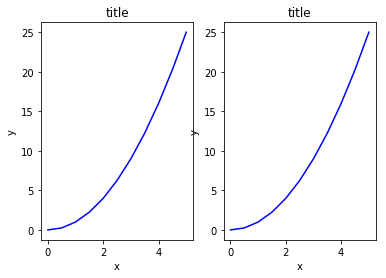

In [13]:
for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

# Display the figure object    
fig

Общей проблемой с matplolib является перекрытие subplots или figures. Мы используем метод fig.tight_layout () или plt.tight_layout (), который автоматически регулирует положение осей на холсте фигур, чтобы не было перекрывающегося содержимого:


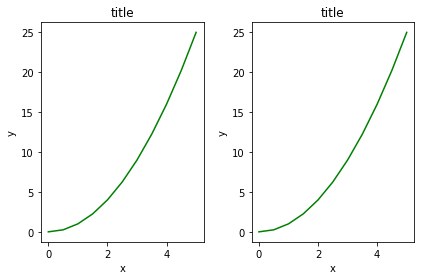

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

fig    
plt.tight_layout()

### Размер изображения, соотношение сторон и DPI

Matplotlib позволяет определять пропорции, DPI и размер фигуры при создании объекта Figure. Вы можете использовать аргументы `figsize` и `dpi`.

* `figsize` - кортеж ширины и высоты фигуры в дюймах
* `dpi` - это точки на дюйм (пиксель на дюйм).
Например:

In [15]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

Те же аргументы также могут быть переданы менеджерам макетов, таким как функция `subplots:

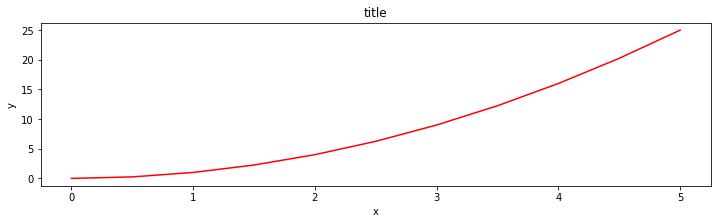

In [16]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

## Сохранение графиков

Matplotlib может генерировать высококачественный output в числовых форматах, включая PNG, JPG, EPS, SVG, PGF и PDF.

Чтобы сохранить график в файле, мы можем использовать метод `savefig` в классе` Figure`:

In [17]:
fig.savefig("filename.png")

Здесь мы также можем указать DPI и выбрать между различными форматами вывода:

In [18]:
fig.savefig("filename.png", dpi=200)

____
## Легенды, ярлыки и названия

Теперь, когда мы рассмотрели основы создания холста фигуры и добавили экземпляры осей к холсту, давайте посмотрим, как украсить фигуру названиями, ярлыками осей и легендами.

**Figure titles**

Заголовок может быть добавлен к каждому экземпляру оси в фигуре. Чтобы установить заголовок, используйте метод `set_title` в экземпляре осей:

In [41]:
ax.set_title("title");

**Axis labels**

Аналогично, с помощью методов `set_xlabel` и `set_ylabel` мы можем установить метки осей X и Y:

In [19]:
ax.set_xlabel("x")
ax.set_ylabel("y");

### Legends

Вы можете использовать аргументы `label = "label text"`, когда графические объекты или другие объекты добавляются к рисунку, а затем используя метод легенды без аргументов, чтобы добавить легенду к рисунку:

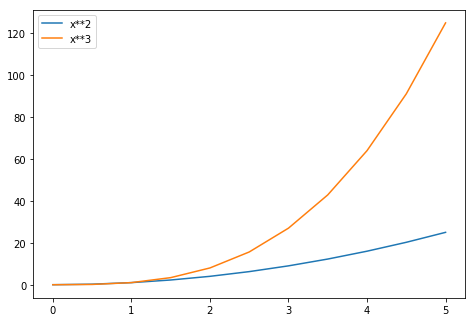

In [20]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend()

Обратите внимание, что легенда может перекрывать некоторые из реальных линий!

Функция `legend` принимает необязательный аргумент ключевого слова `loc`, который можно использовать, чтобы указать, где на рисунке изображена легенда. Допустимые значения `loc` - это числовые коды для различных мест, где можно разместить легенду. Подробнее см. на странице [документации](http://matplotlib.org/users/legend_guide.html#legend-location). Некоторые из наиболее распространенных значений `loc`:

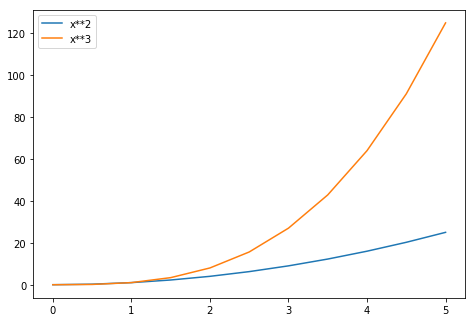

In [21]:
# Lots of options....

ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner

# .. many more options are available

# Most common to choose
ax.legend(loc=0) # let matplotlib decide the optimal location
fig

## Настройка цветов, ширины линий, типов линий

Matplotlib дает вам *много* опций для настройки цветов, линий и типов линий.

Существует базовый синтаксис MATLAB (который я бы предложил вам избегать для большей ясности):

### Цвета с синтаксисом MatLab

С matplotlib мы можем определить цвета линий и других графических элементов несколькими способами. Прежде всего, мы можем использовать синтаксис типа MATLAB, где `b` означает синий, `g` означает зеленый и т. д. Также поддерживается API MATLAB для выбора стилей линий: где, например, `b.-` означает синяя линия с точками:

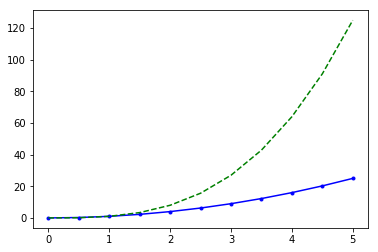

In [22]:
# MATLAB style line color and style 
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

### Цвета с параметром `color =`

Мы также можем определять цвета по их именам или шестнадцатеричным кодам RGB и необязательно предоставлять альфа-значение с использованием аргументов `color` и `alpha`. Альфа указывает на непрозрачность.

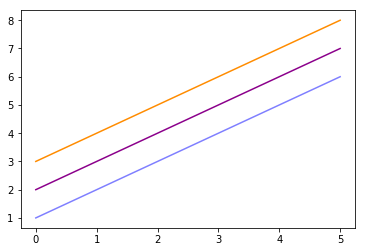

In [23]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) # half-transparant
ax.plot(x, x+2, color="#8B008B")        # RGB hex code
ax.plot(x, x+3, color="#FF8C00")        # RGB hex code 

### Стиль линии и маркера

Чтобы изменить ширину линии, мы можем использовать аргументы `linewidth` или` lw`. Стиль линии можно выбрать с помощью аргументов `linestyle` или ` ls`:

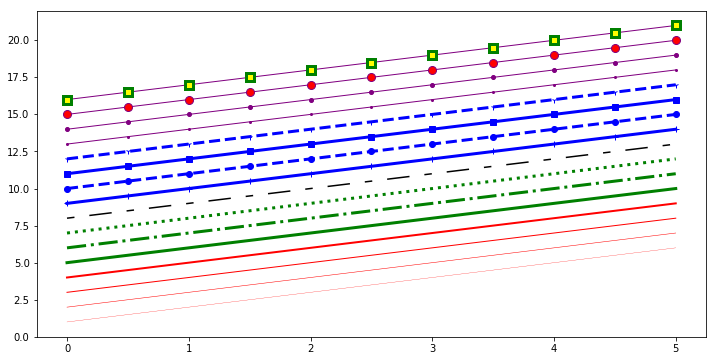

In [24]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

### Контроль внешнего вида оси

В этом разделе мы рассмотрим параметры контроля над диапазоном оси в фигуре matplotlib.

## Диапазон построения

Мы можем настроить диапазоны осей с помощью методов `set_ylim` и` set_xlim` в объекте оси или `axis ('tight')` для автоматического получения «жестко установленных» осей:

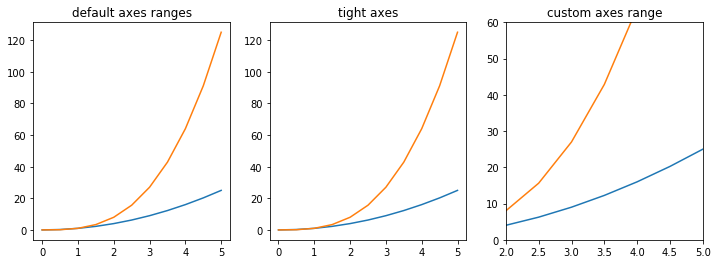

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

# Специальные типы графиков

Есть много специализированных участков, которые мы можем создать, таких как barplots (столбиковая диаграмма), гистограммы, scatter plots (диаграммы рассеяния) и многое другое. Большинство этих типов графиков на самом деле создают с помощью библиотеки `seaborn`, библиотеки для статистической  визуализации на Python. Но вот несколько примеров такого рода графиков:

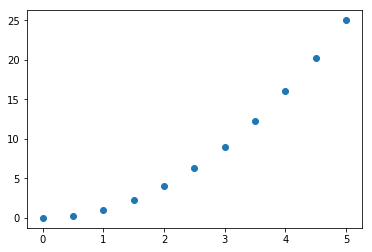

In [26]:
plt.scatter(x,y)

(array([ 8.,  7., 10., 11., 18.,  7., 12.,  9.,  9.,  9.]),
 array([  1. ,  99.8, 198.6, 297.4, 396.2, 495. , 593.8, 692.6, 791.4,
        890.2, 989. ]),
 <a list of 10 Patch objects>)

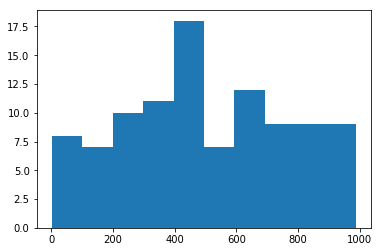

In [27]:
from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data)

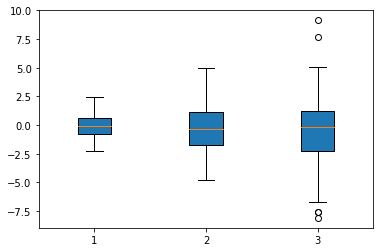

In [28]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# rectangular box plot
plt.boxplot(data,vert=True,patch_artist=True);   

## Дополнительные материалы

* http://www.matplotlib.org - Сайт проекта matplotlib.
* https://github.com/matplotlib/matplotlib - Исходный код matplotlib.
* http://matplotlib.org/gallery.html - Большая галерея, демонстрирующую различные типы графиков matplotlib. Настоятельно рекомендуется!
* http://www.loria.fr/~rougier/teaching/matplotlib - Хороший туториал по matplotlib
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Еще одна хорошая ссылка по matplotlib.
